<a href="https://colab.research.google.com/github/bananighosh/Fall-2023-NYU-AI/blob/assignment_1_probability/CS_GY661_AI_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import seaborn as sns
import scipy.stats as sc_stats

1a. Generate an array of 10^4 with mean =7.25 and standard deviation = 0.875 that will follow normal distribution

In [11]:
gs = np.random.normal(loc=7.25, scale=0.875, size=10000)

(array([  2.,   1.,   2.,   3.,   1.,   6.,   5.,  10.,  10.,  29.,  40.,
         40.,  63., 111.,  92., 166., 196., 265., 282., 369., 435., 459.,
        486., 544., 580., 617., 602., 614., 545., 580., 432., 425., 374.,
        366., 282., 229., 191., 134., 123.,  91.,  64.,  29.,  45.,  27.,
         13.,   3.,   9.,   5.,   1.,   2.]),
 array([ 3.7692277 ,  3.90146139,  4.03369509,  4.16592878,  4.29816248,
         4.43039617,  4.56262987,  4.69486356,  4.82709725,  4.95933095,
         5.09156464,  5.22379834,  5.35603203,  5.48826573,  5.62049942,
         5.75273312,  5.88496681,  6.01720051,  6.1494342 ,  6.2816679 ,
         6.41390159,  6.54613529,  6.67836898,  6.81060268,  6.94283637,
         7.07507007,  7.20730376,  7.33953746,  7.47177115,  7.60400485,
         7.73623854,  7.86847224,  8.00070593,  8.13293962,  8.26517332,
         8.39740701,  8.52964071,  8.6618744 ,  8.7941081 ,  8.92634179,
         9.05857549,  9.19080918,  9.32304288,  9.45527657,  9.58751027,
 

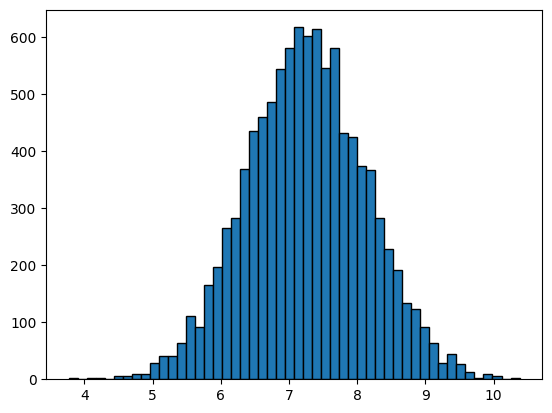

In [12]:
plot.hist(gs, bins=50, edgecolor='black')

1b. Genrating the variables ak, pp, ptime from Multivate Gaussian distribution and plotting the correlation of the associated plots.

In [14]:
sigma = np.matrix('1 0.6 -0.9; 0.6 1 -0.5; -0.9 -0.5 1')
sigma

matrix([[ 1. ,  0.6, -0.9],
        [ 0.6,  1. , -0.5],
        [-0.9, -0.5,  1. ]])

In [32]:
mean = np.zeros(3)
mean

array([0., 0., 0.])

In [58]:
np.random.seed(1234)
APT = np.random.multivariate_normal(mean, sigma, size=10000)
APT

array([[-0.36127836,  0.34968669,  1.11819525],
       [ 0.35719837,  0.66903158,  0.12974387],
       [-0.94087986, -0.25111819,  1.00707132],
       ...,
       [-0.24770166, -0.23731461,  0.09608915],
       [ 0.01497189, -1.38883417, -0.2708827 ],
       [-1.18425028, -1.33327231,  0.84025677]])

In [60]:
corr = np.corrcoef(APT, rowvar = False)
corr

array([[ 1.        ,  0.6048432 , -0.90063772],
       [ 0.6048432 ,  1.        , -0.51155345],
       [-0.90063772, -0.51155345,  1.        ]])

In [61]:
df = pd.DataFrame(APT, columns=['ak', 'pp', 'ptime'])

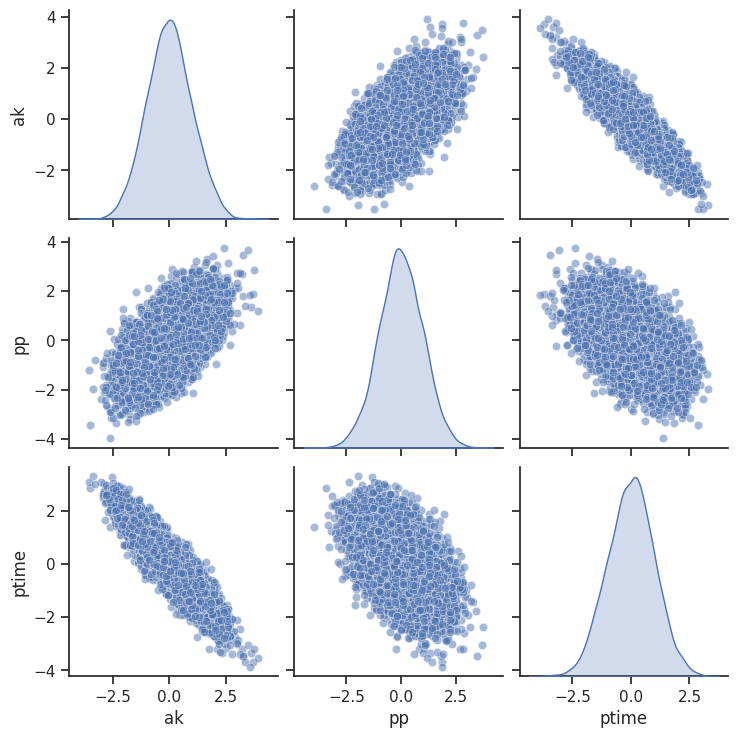

In [62]:
sns.set(style="ticks")
sns.pairplot(df, diag_kind='kde', markers="o", plot_kws={'alpha': 0.5})
plot.show()

1c. For normal distribution, we have to consider the mean as 0 and standard deviation as 1 to yield a uniform distribution because we have created 3 correlated normal distribution(0,1) above.
This is the Cumulatiove Distribution function and it is implemented using scioy's stats module's cdf -> Probility Integral Transform as follows.

In [66]:
U = sc_stats.norm.cdf(APT, loc=0, scale=1)

(array([[ 987., 1022.,  990., 1021., 1020., 1019.,  992.,  934.,  956.,
         1059.],
        [ 995., 1044.,  955., 1042., 1042., 1013.,  956.,  940., 1033.,
          980.],
        [1047.,  985.,  935.,  984.,  961., 1062., 1044.,  994., 1023.,
          965.]]),
 array([3.58997761e-05, 1.00027443e-01, 2.00018987e-01, 3.00010530e-01,
        4.00002073e-01, 4.99993617e-01, 5.99985160e-01, 6.99976703e-01,
        7.99968247e-01, 8.99959790e-01, 9.99951334e-01]),
 <a list of 3 BarContainer objects>)

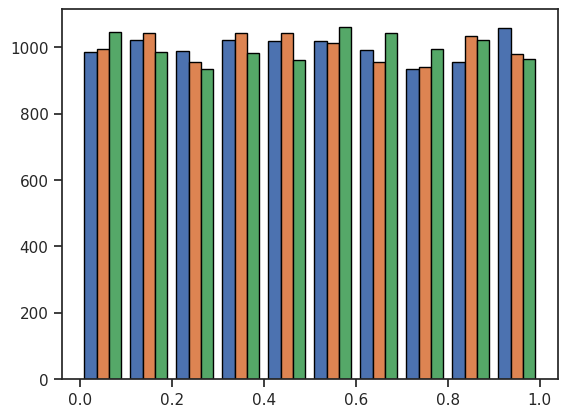

In [68]:
plot.hist(U, bins=10, edgecolor='black')

Therefore, as expected, the above graph represents a uniform distribution from 0 to 1.
Now let's check the effect on the correlation above:

In [75]:
corr_new = np.corrcoef(U, rowvar = False)
corr_new

array([[ 1.        ,  0.58632699, -0.89178402],
       [ 0.58632699,  1.        , -0.49527681],
       [-0.89178402, -0.49527681,  1.        ]])

In [73]:
df1 = pd.DataFrame(U, columns=['ak', 'pp', 'ptime'])

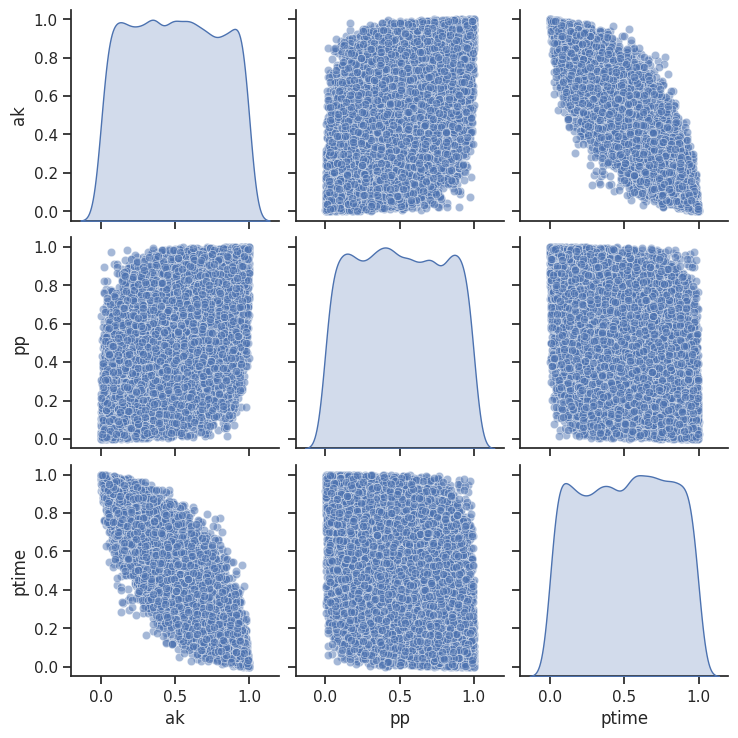

In [74]:
sns.set(style='ticks')
sns.pairplot(df1, diag_kind="kde", markers="o", plot_kws={'alpha': 0.5})
plot.show()